# Titanic Dataset Analysis

In [2]:
#Import Required Libraries to work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Data Acquisition of the Titanic Train and Test dataset

In [3]:
#Read train data set
df_titanic_train_dataset = pd.read_csv('C:\\Users\\sheikmohamed.syedtha\\Documents\\DataSets\\train.csv')

In [4]:
#Check the train dataset shape
df_titanic_train_dataset.shape

(891, 12)

In [5]:
#Visualize first 5 records
df_titanic_train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#Read test data set
df_titanic_test_dataset = pd.read_csv('C:\\Users\\sheikmohamed.syedtha\\Documents\\DataSets\\test.csv')

In [45]:
#Check the test dataset shape
df_titanic_test_dataset.shape

(418, 11)

In [46]:
df_titanic_train_dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [47]:
#Visualize first 5 records
df_titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#Check Stats
df_titanic_train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Perform Exploratory Data Analysis (EDA) for the train dataset and Preprocess data

In [11]:
#Check missing values in columns and impute - 177 missing values in Age column
df_titanic_train_dataset.Age.isnull().sum()

177

In [12]:
#Reorder columns and push the survived column to end
df_titanic_train_dataset = df_titanic_train_dataset[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]

In [13]:
#Split input features and target label
X = df_titanic_train_dataset.iloc[:,:-1].values
y = df_titanic_train_dataset.iloc[:,11].values

In [14]:
#Check X and y splits
#X
#y


In [15]:
# Age imputer
#==============================================================================
# Handle the missing values, we can see that in dataset there are some missing
# values, we will use strategy to impute mean of column values in these places
#==============================================================================

from sklearn.preprocessing import Imputer
# First create an Imputer
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', 
                               axis = 0)
# Set which columns imputer should perform
missingValueImputer = missingValueImputer.fit(X[:,4:5])
# update values of X with new values
X[:,4:5] = missingValueImputer.transform(X[:,4:5])

In [16]:
#Check if 177 missing values in Age column has been imputed with mean
X[:,4:5]

array([[22.0],
       [38.0],
       [26.0],
       [35.0],
       [35.0],
       [29.69911764705882],
       [54.0],
       [2.0],
       [27.0],
       [14.0],
       [4.0],
       [58.0],
       [20.0],
       [39.0],
       [14.0],
       [55.0],
       [2.0],
       [29.69911764705882],
       [31.0],
       [29.69911764705882],
       [35.0],
       [34.0],
       [15.0],
       [28.0],
       [8.0],
       [38.0],
       [29.69911764705882],
       [19.0],
       [29.69911764705882],
       [29.69911764705882],
       [40.0],
       [29.69911764705882],
       [29.69911764705882],
       [66.0],
       [28.0],
       [42.0],
       [29.69911764705882],
       [21.0],
       [18.0],
       [14.0],
       [40.0],
       [27.0],
       [29.69911764705882],
       [3.0],
       [19.0],
       [29.69911764705882],
       [29.69911764705882],
       [29.69911764705882],
       [29.69911764705882],
       [18.0],
       [7.0],
       [21.0],
       [49.0],
       [29.0],
       [65.0],

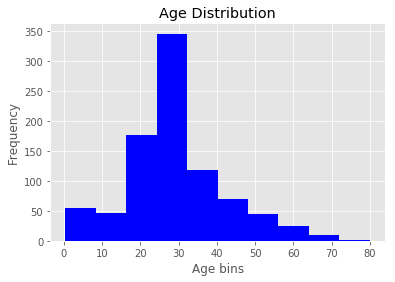

In [17]:
#Visualize Age distribution with a plot on the train dataset
x_axis = X[:,4:5]
style.use('ggplot')
plt.Figure(figsize=(10,10))
plt.hist(x_axis,bins=10,color='blue')
plt.xlabel('Age bins')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

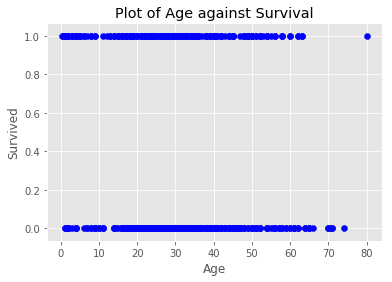

In [18]:
#Plot Age against survival and look for any pattern
x_axis = X[:,4:5]
y_axis = y
style.use('ggplot')
plt.Figure(figsize=(10,10))
plt.scatter(x_axis,y_axis,color='blue')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Plot of Age against Survival')
plt.show()

#Below plot tells us that age group approx. between 65 and 79 have never survived the tragedy! 
#Age feature must be considered for model training.

In [19]:
#Sex Feature must be label encoded as it is a categorical feature
#==============================================================================
# Encode the categorial data. So now instead of character values we will have
# corresponding numerical values
#==============================================================================

from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:,3] = X_labelencoder.fit_transform(X[:,3])
X

array([[1, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [2, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [3, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [889, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [890, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [891, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

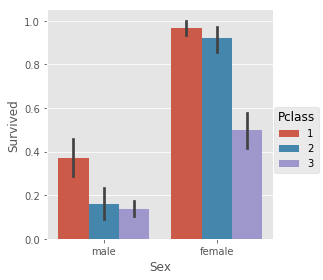

In [20]:
#Visualize factor plot using seaborn for sex,survived with hue as Pclass(3D) 
#Use original train dataset
# Set up a factorplot
sns.factorplot(x="Sex",y="Survived", hue="Pclass", kind="bar",data=df_titanic_train_dataset)

#Below conditional factor plot illustrate below points
#1. female passengers from 1st and 2nd Pclass survived the tragedy.
#2. Male passengers irrespective of Pclass  - survival rate is lesser than female passengers
#Pclass, Sex are features that must be considered for model training

In [21]:
#Feature Scaling 
#Lets scale Age column for model training

from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X[:,4:5] = stdsclr.fit_transform(X[:,4:5])

C:\Users\sheikmohamed.syedtha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
#Select cols = ["Pclass","Sex","Age"] for model training
pclass_col = X[:,1]
sex_col = X[:,3]
age_col = X[:,4]
X = np.column_stack((pclass_col,sex_col,age_col))

In [23]:
X

array([[3, 1, -0.5924805998028931],
       [1, 0, 0.6387890120425208],
       [3, 0, -0.2846631968415396],
       ...,
       [3, 0, 0.0],
       [1, 1, -0.2846631968415396],
       [3, 1, 0.17706290760049057]], dtype=object)

# Machine Learning Model Training

In [24]:
#Split data from training set to train and test the model - size as 75% train-25% test
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/4,random_state=0)


C:\Users\sheikmohamed.syedtha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
#Check shape
y_test.shape

(223,)

In [26]:
#==============================================================================
# Fitting the Logistic Regression algorithm to the Training set
#==============================================================================

from sklearn.linear_model import LogisticRegression
logResgressionagent = LogisticRegression()
logResgressionagent.fit (X_train, y_train ) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
#Predict with 25% split test data
predict_survival = logResgressionagent.predict(X_test)
predict_survival

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [28]:
# Use score method to check accuracy of model 
score = logResgressionagent.score(X_test, y_test)
print(score)

#Achieved 78% accuracy - my model predicts with 78% accuracy - needs to evolve

0.7847533632286996


In [32]:
#==============================================================================
# Fitting the Support vector machine algorithm to the Training set
#==============================================================================

from sklearn import svm
svmagent = svm.SVC()
svmagent.fit (X_train, y_train ) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
#Predict with 25% split test data
predict_survival_svm = svmagent.predict(X_test)
predict_survival_svm

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [34]:
# Use score method to check accuracy of model 
score_svm = svmagent.score(X_test, y_test)
print(score_svm)

#Achieved around 80% accuracy - my svm model predicts with 80% accuracy - needs to evolve

0.7937219730941704


In [35]:
#==============================================================================
# Fitting the Naive Bayes algorithm to the Training set
#==============================================================================

from sklearn.naive_bayes import GaussianNB
nbagent = GaussianNB()
nbagent.fit (X_train, y_train ) 

GaussianNB(priors=None)

In [36]:
#Predict with 25% split test data
predict_survival_nb = nbagent.predict(X_test)
predict_survival_nb

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [37]:
# Use score method to check accuracy of model 
score_nb = nbagent.score(X_test, y_test)
print(score_nb)

#Achieved around 80% accuracy - my nb model predicts with 78% accuracy - needs to evolve

0.7802690582959642


# Ready to Predict Survival for the test dataset

In [48]:
#View Test set
df_titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
#Pick Pclass, Sex and Age columns only to feed in to model for prediction
df_titanic_test_dataset  = df_titanic_test_dataset[['Pclass','Sex','Age']]
df_titanic_test_dataset
X1 = df_titanic_test_dataset
X1.head()

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


# Pre-Process Test Set before prediction

In [53]:
#Sex Feature must be label encoded as it is a categorical feature
#==============================================================================
# Encode the categorial data. So now instead of character values we will have
# corresponding numerical values
#=============================================================================
X1.Sex= X_labelencoder.fit_transform(X1.Sex)
X1

,Pclass,Sex,Age
0,3,1,34.5
1,3,0,47.0
2,2,1,62.0
3,3,1,27.0
4,3,0,22.0
5,3,1,14.0
6,3,0,30.0
7,2,1,26.0
8,3,0,18.0
9,3,1,21.0


In [56]:
# Age imputer
#==============================================================================
# Handle the missing values, we can see that in dataset there are some missing
# values, we will use strategy to impute mean of column values in these places
#==============================================================================
X1.Age =  X1.Age.fillna(X1.Age.mean())

In [57]:
#View test set
X1

,Pclass,Sex,Age
0,3,1,34.50000
1,3,0,47.00000
2,2,1,62.00000
3,3,1,27.00000
4,3,0,22.00000
5,3,1,14.00000
6,3,0,30.00000
7,2,1,26.00000
8,3,0,18.00000
9,3,1,21.00000


In [99]:
#Feature Scaling 
#Lets scale Age column for model training
age_col = X1.iloc[:,:].values
stdsclr.fit(age_col[:,2:3])
age_col[:,2:3] = stdsclr.transform(age_col[:,2:3])

In [100]:
X1.Age = age_col[:,2]

In [101]:
#View Final test set
X1

,Pclass,Sex,Age
0,3,1,0.334993
1,3,0,1.325530
2,2,1,2.514175
3,3,1,-0.259330
4,3,0,-0.655545
5,3,1,-1.289489
6,3,0,-0.021601
7,2,1,-0.338573
8,3,0,-0.972517
9,3,1,-0.734788


In [102]:
#Let's Predict test set using svmagent as accuracy of this model is 80%
svmagent.predict(X1)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,